# Exploration du Dataset Online Retail II

Ce notebook explore le dataset Online Retail II pour comprendre les transactions e-commerce et préparer les analyses de segmentation client (RFM, CLV).

**Dataset**: Transactions e-commerce (~500k lignes)
**Objectif**: Exploration initiale, nettoyage et visualisations clés

## 1. Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## 2. Chargement des données

In [2]:
# Chemin vers le fichier Excel
data_path = '/Users/maximedutertre/Desktop/Ecole/ECE/4eme annee/data-visualisation/projet_final/data/raw/online_retail_II.xlsx'

# Chargement du fichier Excel (peut prendre quelques secondes)
print("Chargement des données en cours...")
df_raw = pd.read_excel(data_path)

print(f"Données chargées: {df_raw.shape[0]:,} lignes et {df_raw.shape[1]} colonnes")
print(f"Période: {df_raw['InvoiceDate'].min()} à {df_raw['InvoiceDate'].max()}")

Chargement des données en cours...
Données chargées: 525,461 lignes et 8 colonnes
Période: 2009-12-01 07:45:00 à 2010-12-09 20:01:00


## 3. Aperçu initial des données

In [3]:
# Premières lignes
df_raw.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
# Informations sur les colonnes et types de données
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# Statistiques descriptives
df_raw.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


## 4. Qualité des données - Valeurs manquantes

In [6]:
# Analyse des valeurs manquantes
missing_data = pd.DataFrame({
    'Colonnes': df_raw.columns,
    'Valeurs manquantes': df_raw.isnull().sum(),
    'Pourcentage': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
}).sort_values('Valeurs manquantes', ascending=False)

print("Valeurs manquantes par colonne:")
print(missing_data[missing_data['Valeurs manquantes'] > 0])

Valeurs manquantes par colonne:
                Colonnes  Valeurs manquantes  Pourcentage
Customer ID  Customer ID              107927        20.54
Description  Description                2928         0.56


## 5. Nettoyage des données

Nous allons documenter chaque étape de nettoyage et le nombre de lignes perdues.

In [7]:
# Copie pour le nettoyage
df = df_raw.copy()

print(f"Lignes initiales: {len(df):,}")
print("="*60)

# 1. Suppression des lignes avec Customer ID manquant
# (nécessaire pour l'analyse client)
rows_before = len(df)
df = df[df['Customer ID'].notna()]
rows_lost = rows_before - len(df)
print(f"Etape 1 - Suppression Customer ID manquants: {rows_lost:,} lignes perdues")
print(f"  Raison: Impossible d'analyser les clients sans identifiant")
print(f"  Lignes restantes: {len(df):,}")
print()

# 2. Suppression des lignes avec Description manquante
rows_before = len(df)
df = df[df['Description'].notna()]
rows_lost = rows_before - len(df)
print(f"Etape 2 - Suppression Description manquantes: {rows_lost:,} lignes perdues")
print(f"  Raison: Produits non identifiables")
print(f"  Lignes restantes: {len(df):,}")
print()

# 3. Suppression des quantités négatives ou nulles
# (retours ou annulations)
rows_before = len(df)
df = df[df['Quantity'] > 0]
rows_lost = rows_before - len(df)
print(f"Etape 3 - Suppression Quantity <= 0: {rows_lost:,} lignes perdues")
print(f"  Raison: Retours/annulations (Quantity négative ou nulle)")
print(f"  Lignes restantes: {len(df):,}")
print()

# 4. Suppression des prix négatifs ou nuls
rows_before = len(df)
df = df[df['Price'] > 0]
rows_lost = rows_before - len(df)
print(f"Etape 4 - Suppression Price <= 0: {rows_lost:,} lignes perdues")
print(f"  Raison: Prix invalides ou produits gratuits")
print(f"  Lignes restantes: {len(df):,}")
print()

# 5. Calcul du revenu par ligne
df['Revenue'] = df['Quantity'] * df['Price']

# Résumé final
print("="*60)
total_lost = len(df_raw) - len(df)
percent_lost = (total_lost / len(df_raw) * 100)
print(f"RESUME FINAL:")
print(f"  Lignes initiales: {len(df_raw):,}")
print(f"  Lignes nettoyées: {len(df):,}")
print(f"  Lignes perdues: {total_lost:,} ({percent_lost:.2f}%)")
print(f"  Lignes conservées: {len(df)/len(df_raw)*100:.2f}%")

Lignes initiales: 525,461
Etape 1 - Suppression Customer ID manquants: 107,927 lignes perdues
  Raison: Impossible d'analyser les clients sans identifiant
  Lignes restantes: 417,534

Etape 2 - Suppression Description manquantes: 0 lignes perdues
  Raison: Produits non identifiables
  Lignes restantes: 417,534

Etape 3 - Suppression Quantity <= 0: 9,839 lignes perdues
  Raison: Retours/annulations (Quantity négative ou nulle)
  Lignes restantes: 407,695

Etape 4 - Suppression Price <= 0: 31 lignes perdues
  Raison: Prix invalides ou produits gratuits
  Lignes restantes: 407,664

RESUME FINAL:
  Lignes initiales: 525,461
  Lignes nettoyées: 407,664
  Lignes perdues: 117,797 (22.42%)
  Lignes conservées: 77.58%


## 6. Statistiques générales après nettoyage

In [8]:
print("STATISTIQUES GENERALES")
print("="*60)
print(f"Période: {df['InvoiceDate'].min().date()} à {df['InvoiceDate'].max().date()}")
print(f"Nombre de transactions: {df['Invoice'].nunique():,}")
print(f"Nombre de clients uniques: {df['Customer ID'].nunique():,}")
print(f"Nombre de produits uniques: {df['StockCode'].nunique():,}")
print(f"Nombre de pays: {df['Country'].nunique()}")
print()
print(f"Revenu total: £{df['Revenue'].sum():,.2f}")
print(f"Revenu moyen par transaction: £{df.groupby('Invoice')['Revenue'].sum().mean():,.2f}")
print(f"Panier moyen (articles): {df.groupby('Invoice')['Quantity'].sum().mean():.2f}")

STATISTIQUES GENERALES
Période: 2009-12-01 à 2010-12-09
Nombre de transactions: 19,213
Nombre de clients uniques: 4,312
Nombre de produits uniques: 4,017
Nombre de pays: 37

Revenu total: £8,832,003.27
Revenu moyen par transaction: £459.69
Panier moyen (articles): 288.26


## 7. Visualisation 1: Revenu au fil du temps

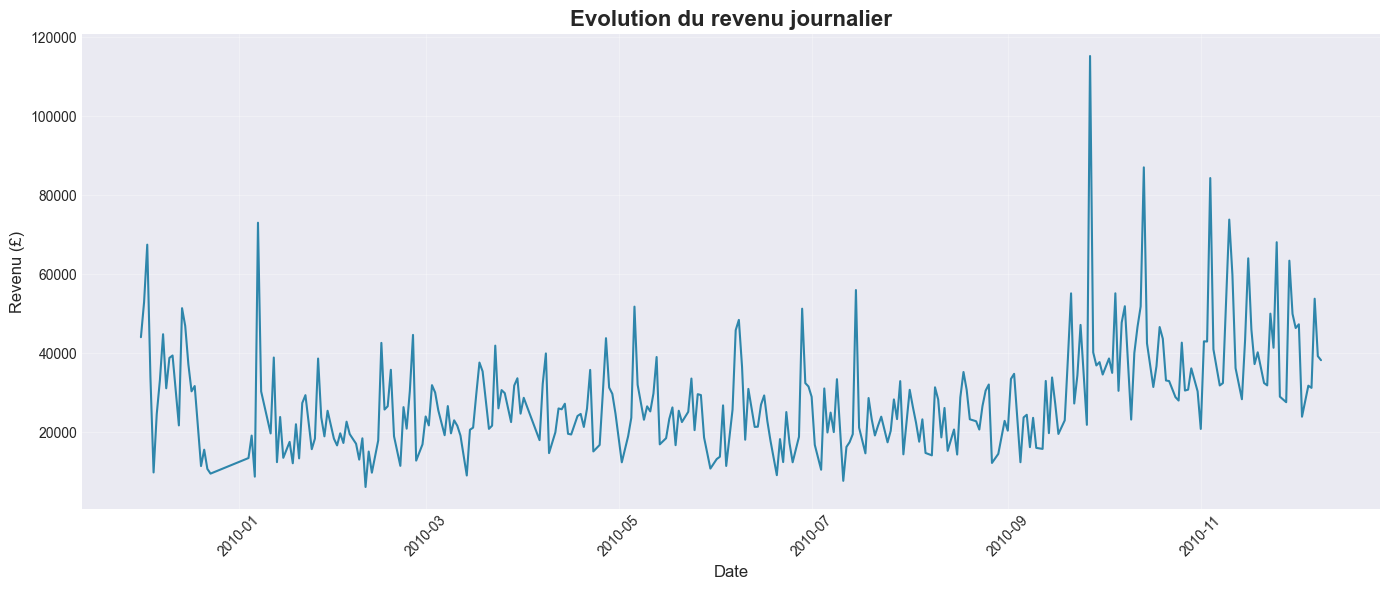

Revenu journalier moyen: £28,768.74
Jour avec le plus haut revenu: 2010-09-27 (£115,243.44)


In [9]:
# Agrégation du revenu par jour
df['Date'] = df['InvoiceDate'].dt.date
daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()

# Graphique
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_revenue['Date'], daily_revenue['Revenue'], linewidth=1.5, color='#2E86AB')
ax.set_title('Evolution du revenu journalier', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenu (£)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Revenu journalier moyen: £{daily_revenue['Revenue'].mean():,.2f}")
print(f"Jour avec le plus haut revenu: {daily_revenue.loc[daily_revenue['Revenue'].idxmax(), 'Date']} (£{daily_revenue['Revenue'].max():,.2f})")

## 8. Visualisation 2: Top 10 pays par revenu

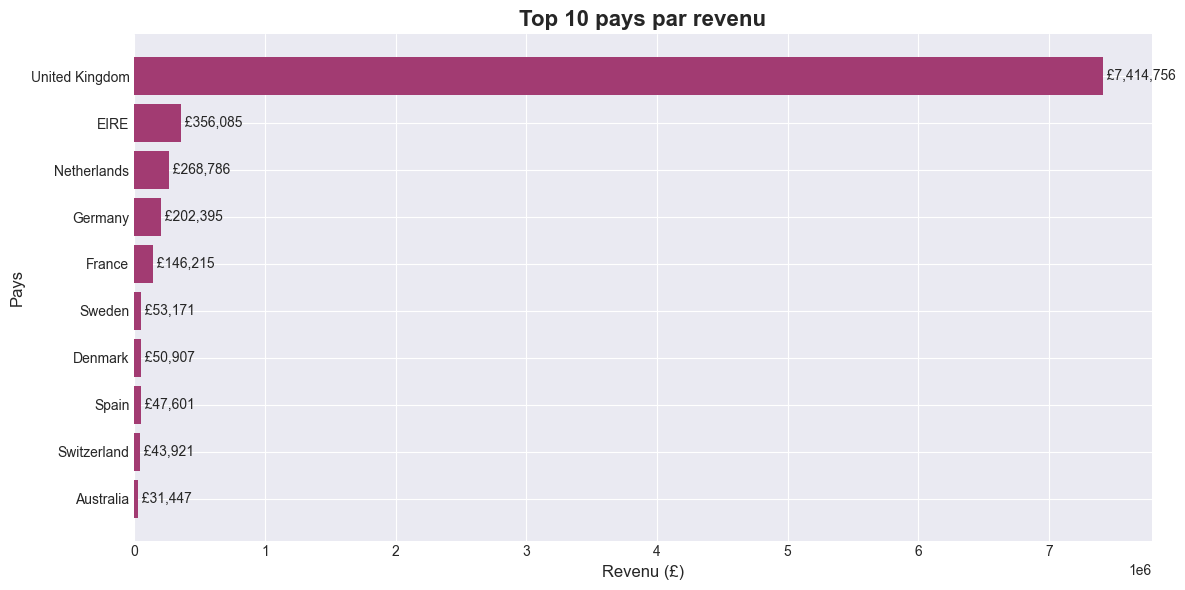


Détails des top 10 pays:
                     Revenu  Clients  Transactions
Country                                           
United Kingdom  7414755.963     3969         17612
EIRE             356085.210        5           316
Netherlands      268786.000       22           135
Germany          202395.321       67           347
France           146215.420       47           236
Sweden            53171.390       16            68
Denmark           50906.850        9            26
Spain             47601.420       25            66
Switzerland       43921.390       14            40
Australia         31446.800       15            40


In [10]:
# Top 10 pays
country_revenue = df.groupby('Country').agg({
    'Revenue': 'sum',
    'Customer ID': 'nunique',
    'Invoice': 'nunique'
}).sort_values('Revenue', ascending=False).head(10)

country_revenue.columns = ['Revenu', 'Clients', 'Transactions']

# Graphique
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(country_revenue.index, country_revenue['Revenu'], color='#A23B72')
ax.set_title('Top 10 pays par revenu', fontsize=16, fontweight='bold')
ax.set_xlabel('Revenu (£)', fontsize=12)
ax.set_ylabel('Pays', fontsize=12)
ax.invert_yaxis()

# Annotations
for i, (idx, row) in enumerate(country_revenue.iterrows()):
    ax.text(row['Revenu'], i, f" £{row['Revenu']:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Tableau détaillé
print("\nDétails des top 10 pays:")
print(country_revenue.to_string())

## 9. Visualisation 3: Analyse des produits

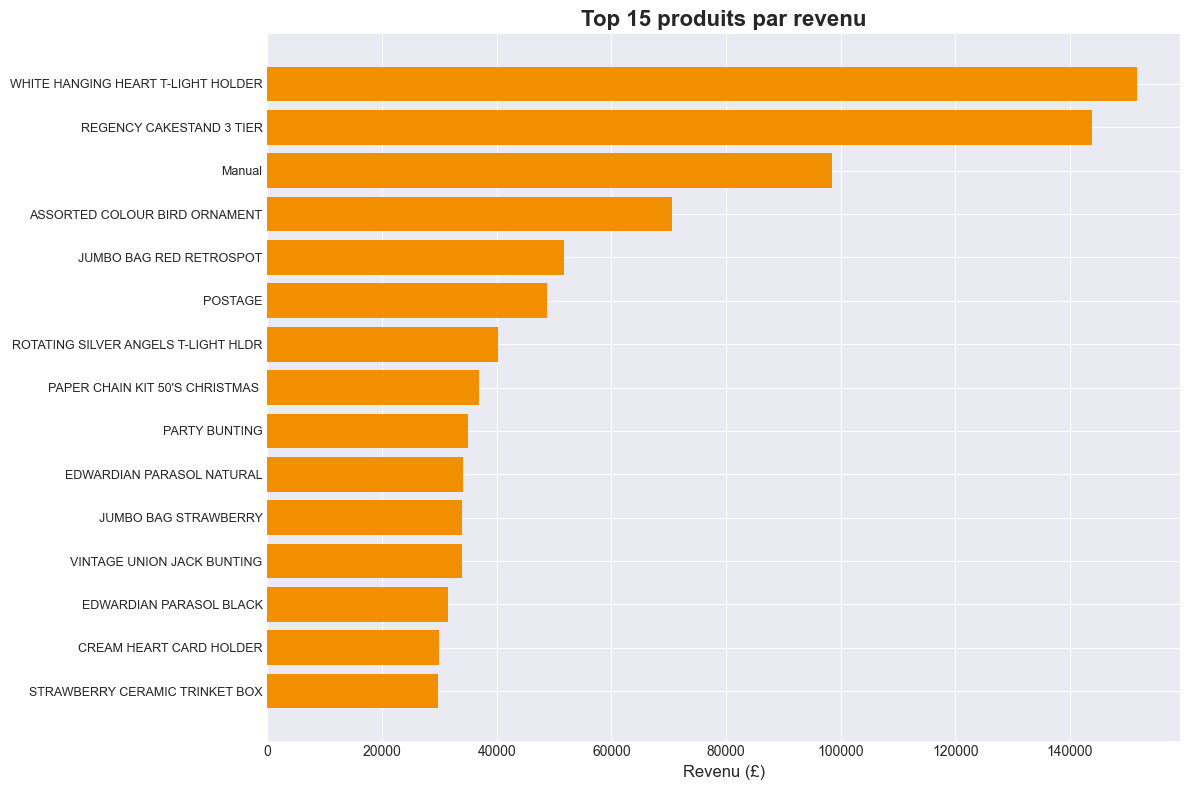


Top 5 produits détaillés:
                                                 Revenu  Quantité vendue  Nombre de commandes
StockCode Description                                                                        
85123A    WHITE HANGING HEART T-LIGHT HOLDER  151624.31            56915                 3021
22423     REGENCY CAKESTAND 3 TIER            143893.35            12497                 1687
M         Manual                               98560.64             2630                  382
84879     ASSORTED COLOUR BIRD ORNAMENT        70493.83            44551                 1333
85099B    JUMBO BAG RED RETROSPOT              51759.30            29578                 1060


In [11]:
# Top 15 produits par revenu
product_revenue = df.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique'
}).sort_values('Revenue', ascending=False).head(15)

product_revenue.columns = ['Revenu', 'Quantité vendue', 'Nombre de commandes']

# Graphique
fig, ax = plt.subplots(figsize=(12, 8))
y_pos = range(len(product_revenue))
bars = ax.barh(y_pos, product_revenue['Revenu'], color='#F18F01')

# Labels courts pour les produits
labels = [desc[:40] + '...' if len(desc) > 40 else desc for desc in product_revenue.index.get_level_values('Description')]
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=9)
ax.set_title('Top 15 produits par revenu', fontsize=16, fontweight='bold')
ax.set_xlabel('Revenu (£)', fontsize=12)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 5 produits détaillés:")
print(product_revenue.head().to_string())

## 10. Visualisation 4: Distribution des clients

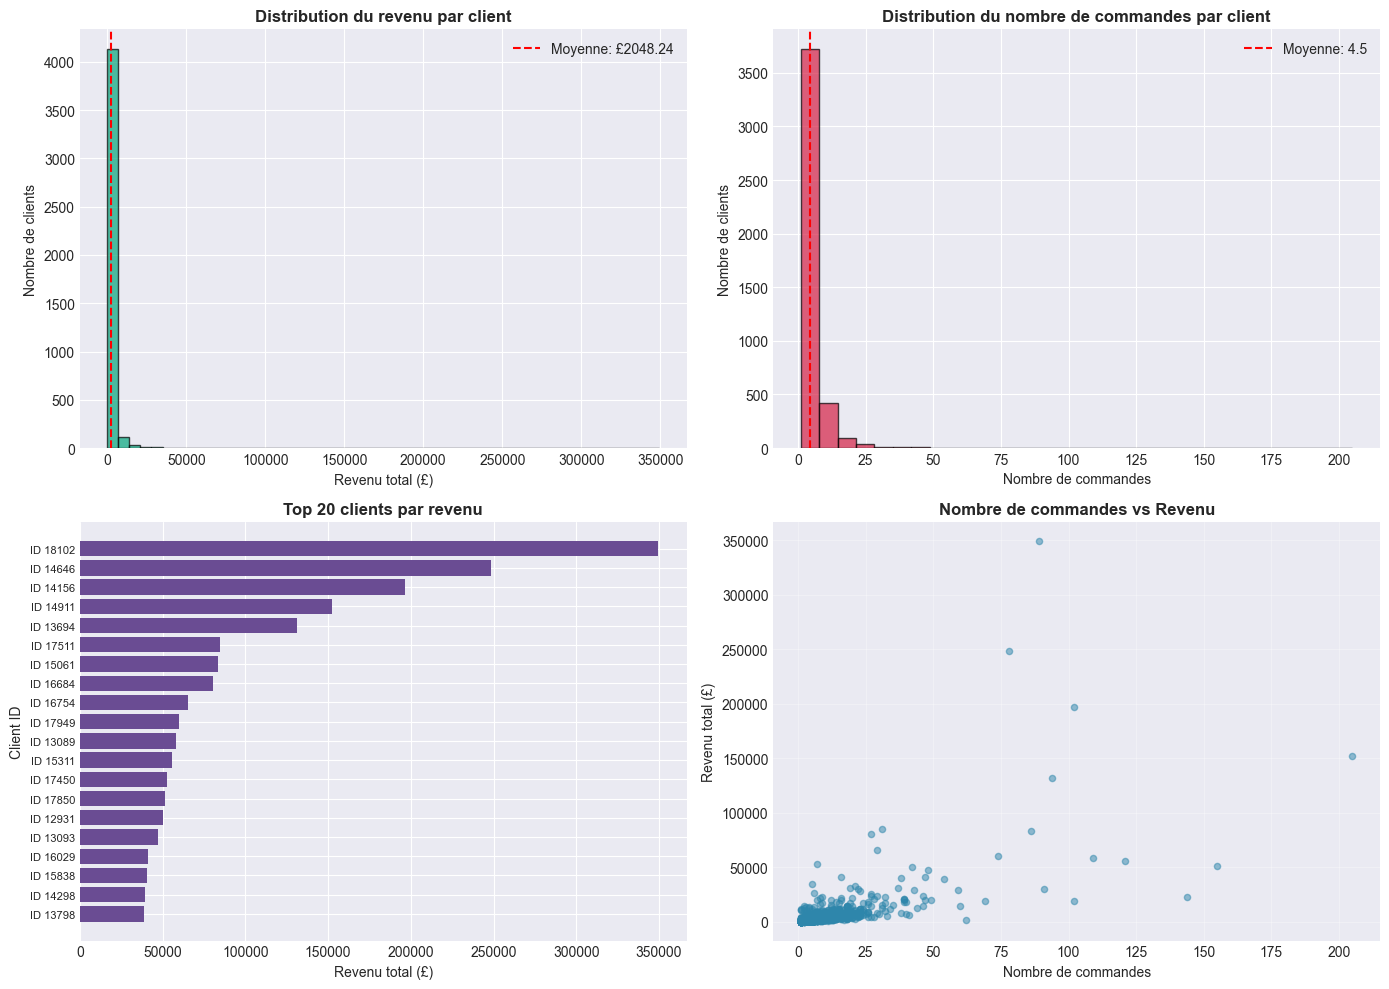

STATISTIQUES CLIENTS
Nombre total de clients: 4,312
Revenu moyen par client: £2,048.24
Revenu médian par client: £706.02
Commandes moyennes par client: 4.46
Articles moyens par client: 1284.40

Top 5 clients:
             Revenu total  Nombre de commandes  Articles achetés
Customer ID                                                     
18102.0         349164.35                   89            124216
14646.0         248396.50                   78            170278
14156.0         196566.74                  102            108107
14911.0         152147.57                  205             69722
13694.0         131443.19                   94            125893


In [12]:
# Analyse par client
customer_stats = df.groupby('Customer ID').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    'Revenue': 'Revenu total',
    'Invoice': 'Nombre de commandes',
    'Quantity': 'Articles achetés'
})

# Graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution du revenu par client
axes[0, 0].hist(customer_stats['Revenu total'], bins=50, color='#06A77D', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution du revenu par client', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Revenu total (£)')
axes[0, 0].set_ylabel('Nombre de clients')
axes[0, 0].axvline(customer_stats['Revenu total'].mean(), color='red', linestyle='--', label=f"Moyenne: £{customer_stats['Revenu total'].mean():.2f}")
axes[0, 0].legend()

# 2. Distribution du nombre de commandes par client
axes[0, 1].hist(customer_stats['Nombre de commandes'], bins=30, color='#D62246', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution du nombre de commandes par client', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Nombre de commandes')
axes[0, 1].set_ylabel('Nombre de clients')
axes[0, 1].axvline(customer_stats['Nombre de commandes'].mean(), color='red', linestyle='--', label=f"Moyenne: {customer_stats['Nombre de commandes'].mean():.1f}")
axes[0, 1].legend()

# 3. Top 20 clients par revenu
top_customers = customer_stats.nlargest(20, 'Revenu total')
axes[1, 0].barh(range(len(top_customers)), top_customers['Revenu total'], color='#6A4C93')
axes[1, 0].set_title('Top 20 clients par revenu', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Revenu total (£)')
axes[1, 0].set_ylabel('Client ID')
axes[1, 0].set_yticks(range(len(top_customers)))
axes[1, 0].set_yticklabels([f"ID {int(cid)}" for cid in top_customers.index], fontsize=8)
axes[1, 0].invert_yaxis()

# 4. Relation commandes vs revenu
axes[1, 1].scatter(customer_stats['Nombre de commandes'], customer_stats['Revenu total'], 
                   alpha=0.5, color='#2E86AB', s=20)
axes[1, 1].set_title('Nombre de commandes vs Revenu', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de commandes')
axes[1, 1].set_ylabel('Revenu total (£)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques clients
print("STATISTIQUES CLIENTS")
print("="*60)
print(f"Nombre total de clients: {len(customer_stats):,}")
print(f"Revenu moyen par client: £{customer_stats['Revenu total'].mean():,.2f}")
print(f"Revenu médian par client: £{customer_stats['Revenu total'].median():,.2f}")
print(f"Commandes moyennes par client: {customer_stats['Nombre de commandes'].mean():.2f}")
print(f"Articles moyens par client: {customer_stats['Articles achetés'].mean():.2f}")
print()
print("Top 5 clients:")
print(customer_stats.nlargest(5, 'Revenu total').to_string())

## 11. Analyse temporelle

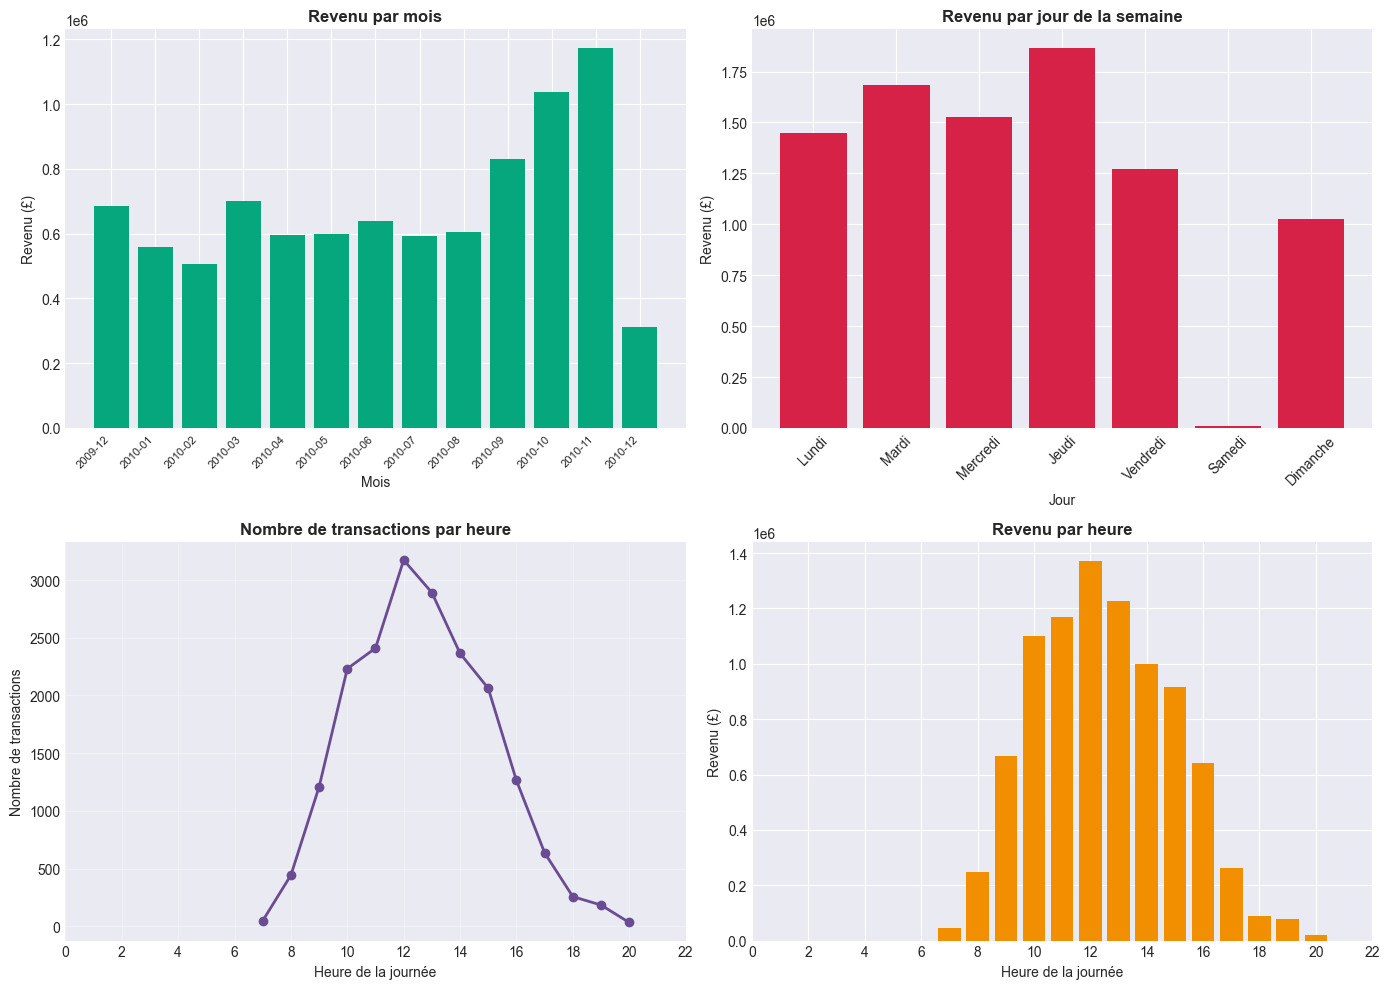

In [13]:
# Extraction des composantes temporelles
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Graphiques temporels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Revenu par mois
monthly_revenue = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
axes[0, 0].bar(range(len(monthly_revenue)), monthly_revenue['Revenue'], color='#06A77D')
axes[0, 0].set_title('Revenu par mois', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Mois')
axes[0, 0].set_ylabel('Revenu (£)')
axes[0, 0].set_xticks(range(len(monthly_revenue)))
axes[0, 0].set_xticklabels(monthly_revenue['YearMonth'], rotation=45, ha='right', fontsize=8)

# 2. Revenu par jour de la semaine
dow_revenue = df.groupby('DayOfWeek')['Revenue'].sum()
dow_names = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
axes[0, 1].bar(dow_names, dow_revenue.values, color='#D62246')
axes[0, 1].set_title('Revenu par jour de la semaine', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Jour')
axes[0, 1].set_ylabel('Revenu (£)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Nombre de transactions par heure
hourly_transactions = df.groupby('Hour')['Invoice'].nunique()
axes[1, 0].plot(hourly_transactions.index, hourly_transactions.values, marker='o', color='#6A4C93', linewidth=2)
axes[1, 0].set_title('Nombre de transactions par heure', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Heure de la journée')
axes[1, 0].set_ylabel('Nombre de transactions')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# 4. Revenu par heure
hourly_revenue = df.groupby('Hour')['Revenue'].sum()
axes[1, 1].bar(hourly_revenue.index, hourly_revenue.values, color='#F18F01')
axes[1, 1].set_title('Revenu par heure', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Heure de la journée')
axes[1, 1].set_ylabel('Revenu (£)')
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

## 12. Résumé et prochaines étapes

In [14]:
print("RESUME DE L'EXPLORATION")
print("="*60)
print("\nDonnées nettoyées:")
print(f"  - {len(df):,} transactions valides")
print(f"  - {df['Customer ID'].nunique():,} clients uniques")
print(f"  - {df['StockCode'].nunique():,} produits uniques")
print(f"  - {df['Country'].nunique()} pays")
print(f"  - Revenu total: £{df['Revenue'].sum():,.2f}")
print()
print("Qualité des données:")
print(f"  - Taux de conservation: {len(df)/len(df_raw)*100:.2f}%")
print(f"  - Aucune valeur manquante dans les colonnes critiques")
print()
print("Insights clés:")
print(f"  - Pays dominant: {df.groupby('Country')['Revenue'].sum().idxmax()}")
print(f"  - Période la plus active: {monthly_revenue.loc[monthly_revenue['Revenue'].idxmax(), 'YearMonth']}")
print(f"  - Heure de pointe: {hourly_revenue.idxmax()}h")
print()
print("Prochaines étapes:")
print("  1. Analyse RFM (Recency, Frequency, Monetary)")
print("  2. Segmentation des clients")
print("  3. Calcul de la Customer Lifetime Value (CLV)")
print("  4. Analyse de cohortes")
print("  5. Modèles prédictifs de churn")

RESUME DE L'EXPLORATION

Données nettoyées:
  - 407,664 transactions valides
  - 4,312 clients uniques
  - 4,017 produits uniques
  - 37 pays
  - Revenu total: £8,832,003.27

Qualité des données:
  - Taux de conservation: 77.58%
  - Aucune valeur manquante dans les colonnes critiques

Insights clés:
  - Pays dominant: United Kingdom
  - Période la plus active: 2010-11
  - Heure de pointe: 12h

Prochaines étapes:
  1. Analyse RFM (Recency, Frequency, Monetary)
  2. Segmentation des clients
  3. Calcul de la Customer Lifetime Value (CLV)
  4. Analyse de cohortes
  5. Modèles prédictifs de churn


## 13. Sauvegarde des données nettoyées (optionnel)

In [ ]:
# Sauvegarde des données nettoyées pour analyses futures
output_path = '/Users/maximedutertre/Desktop/Ecole/ECE/4eme annee/data-visualisation/projet_final/data/processed/online_retail_clean.csv'

# Créer le dossier processed s'il n'existe pas
from pathlib import Path
Path(output_path).parent.mkdir(parents=True, exist_ok=True)

# Sauvegarde
df.to_csv(output_path, index=False, encoding='utf-8')
print(f"Données nettoyées sauvegardées: {output_path}")
print(f"Taille du fichier: {Path(output_path).stat().st_size / (1024*1024):.2f} MB")